In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('/kaggle/input/hull-tactical-market-prediction/train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        8990 non-null   int64  
 1   D1                             8990 non-null   int64  
 2   D2                             8990 non-null   int64  
 3   D3                             8990 non-null   int64  
 4   D4                             8990 non-null   int64  
 5   D5                             8990 non-null   int64  
 6   D6                             8990 non-null   int64  
 7   D7                             8990 non-null   int64  
 8   D8                             8990 non-null   int64  
 9   D9                             8990 non-null   int64  
 10  E1                             7206 non-null   float64
 11  E10                            7984 non-null   float64
 12  E11                            7984 non-null   f

In [4]:
df_train.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


# Feature Engneering

In [5]:
import math

col_na = []
for col, i in df_train.isna().sum().items():
    if (i!=0): col_na.append(col)

for col in col_na:
    if (math.isnan(df_train[col][0])):
        df_train[col][0] = 0
for col in col_na:
    while (df_train[col].isna().sum() > 0):
        df_train[col] = df_train[col].fillna(method='ffill')

In [6]:
col = df_train.columns.tolist()
col.remove('forward_returns',)
col.remove('risk_free_rate')
col.remove('market_forward_excess_returns')
col.remove('date_id')

In [7]:
for i in col:
    df_train[f'{i}_20leg_mean'] = df_train[i].rolling(window=20).mean()
    df_train[f'{i}_20leg_std'] = df_train[i].rolling(window=20).std()

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Columns: 286 entries, date_id to V9_20leg_std
dtypes: float64(276), int64(10)
memory usage: 19.6 MB


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65060
[LightGBM] [Info] Number of data points in the train set: 8990, number of used features: 282
[LightGBM] [Info] Start training from score 0.000051
훈련끝
피처 중요도


<Figure size 1000x800 with 0 Axes>

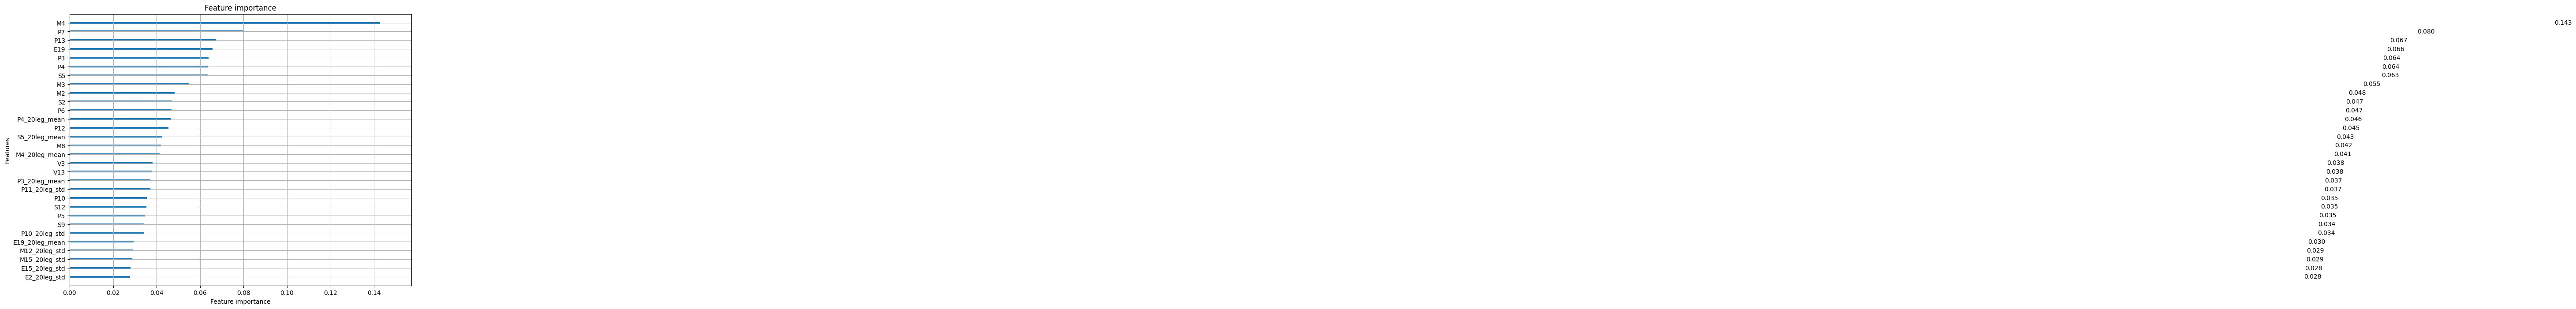

In [9]:
import lightgbm as lgb
import matplotlib.pyplot as plt

label = 'market_forward_excess_returns'
X = df_train.drop([label,'forward_returns', 'risk_free_rate','date_id'], axis=1)
y = df_train[label]

model = lgb.LGBMRegressor(n_estimators=200, n_jobs=1, seed=42)

model.fit(X, y)
print("훈련끝")
print("피처 중요도")
plt.figure(figsize=(10,8))
lgb.plot_importance(
    model,
    max_num_features=30,
    importance_type='gain',
    figsize=(10,8)
)
plt.tight_layout()
plt.show()